# Naive Mean-Field approximation

[![Binder](https://mybinder.org/badge.svg)](https://mybinder.org/v2/gh/danhtaihoang/network-inference/master?filepath=sphinx%2Fcodesource%2Fnmf.ipynb)

In this section, we show the performance of the Naive Mean-Field approximation (nMF) to infer couplings $W_{ij}$ from configurations `s`. We will see that nMF gives good inference results only in the regimes of large sample sizes and small coupling variability but results in the limit of small sample sizes or large coupling variability are inaccurate.   

To start using our jupyter notebook, we first import the nescessary packages.

In [1]:
import numpy as np
import sys
import matplotlib.pyplot as plt
import simulate
import inference
%matplotlib inline

np.random.seed(1)

## Small coupling variability $(g = 2)$ and small sample size $(L = 2 \times 10^3)$

We first use the same parameters as the first example in FEM section above: $N = 100$, $g = 2.0$, and $L=2000$. 

In [2]:
# parameter setting:
n = 100
g = 2.0
w0 = np.random.normal(0.0,g/np.sqrt(n),size=(n,n))

l = 2000
s = simulate.generate_data(w0,l)

Now, we apply the nMF method to recover the coupling matrix `w` from variable configurations `s`.

In [3]:
w = inference.nmf(s)

We plot the heat map of inferred coupling matrix `w` and compare with the actual couplings `w0`:

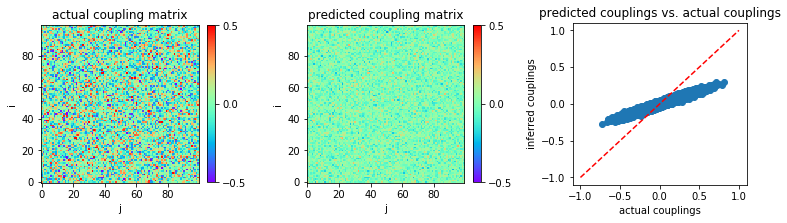

In [4]:
plt.figure(figsize=(11,3.2))

plt.subplot2grid((1,3),(0,0))
plt.title('actual coupling matrix')
plt.imshow(w0,cmap='rainbow',origin='lower')
plt.xlabel('j')
plt.ylabel('i')
plt.clim(-0.5,0.5)
plt.colorbar(fraction=0.045, pad=0.05,ticks=[-0.5,0,0.5])

plt.subplot2grid((1,3),(0,1))
plt.title('predicted coupling matrix')
plt.imshow(w,cmap='rainbow',origin='lower')
plt.xlabel('j')
plt.ylabel('i')
plt.clim(-0.5,0.5)
plt.colorbar(fraction=0.045, pad=0.05,ticks=[-0.5,0,0.5])

plt.subplot2grid((1,3),(0,2))
plt.title('predicted couplings vs. actual couplings')
plt.plot([-1,1],[-1,1],'r--')
plt.scatter(w0,w)
plt.xlabel('actual couplings')
plt.ylabel('inferred couplings')

plt.tight_layout(h_pad=1, w_pad=1.5)
plt.show()

The mean square error (MSE) between actual couplings and inferred couplings is calculated:

In [5]:
MSE = np.mean((w-w0)**2)
print('MSE:',MSE)

('MSE:', 0.016432507950391948)


The inference performance is very poor.

## Small coupling variability $(g = 2)$ and large sample size $(L=10^5)$

Now, if we use a much larger sample size, $L=10^5$ for instance:

In [6]:
l = 100000
s = simulate.generate_data(w0,l)
w = inference.nmf(s)

The inference result is shown below:

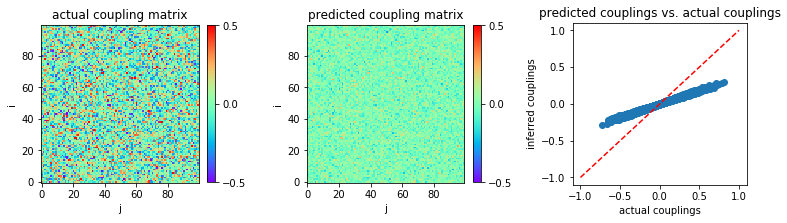

In [7]:
plt.figure(figsize=(11,3.2))

plt.subplot2grid((1,3),(0,0))
plt.title('actual coupling matrix')
plt.imshow(w0,cmap='rainbow',origin='lower')
plt.xlabel('j')
plt.ylabel('i')
plt.clim(-0.5,0.5)
plt.colorbar(fraction=0.045, pad=0.05,ticks=[-0.5,0,0.5])

plt.subplot2grid((1,3),(0,1))
plt.title('predicted coupling matrix')
plt.imshow(w,cmap='rainbow',origin='lower')
plt.xlabel('j')
plt.ylabel('i')
plt.clim(-0.5,0.5)
plt.colorbar(fraction=0.045, pad=0.05,ticks=[-0.5,0,0.5])

plt.subplot2grid((1,3),(0,2))
plt.title('predicted couplings vs. actual couplings')
plt.plot([-1,1],[-1,1],'r--')
plt.scatter(w0,w)
plt.xlabel('actual couplings')
plt.ylabel('inferred couplings')

plt.tight_layout(h_pad=1, w_pad=1.5)
plt.show()

In [8]:
MSE = np.mean((w-w0)**2)
print('MSE:',MSE)

('MSE:', 0.016114338928562788)


The result shows that nMF produces bad prediction results in the limit of large coupling variability, even for large sample sizes.

## Very small coupling variability $(g=0.5)$ and small sample size $(L=2 \times 10^3)$

Now, let us consider very small coupling variability, $g = 0.5$ for instance.

In [9]:
g = 0.5
w0 = np.random.normal(0.0,g/np.sqrt(n),size=(n,n))

We use data length $L=2000$ for our first example.

In [10]:
l = 2000
s = simulate.generate_data(w0,l)
w = inference.nmf(s)

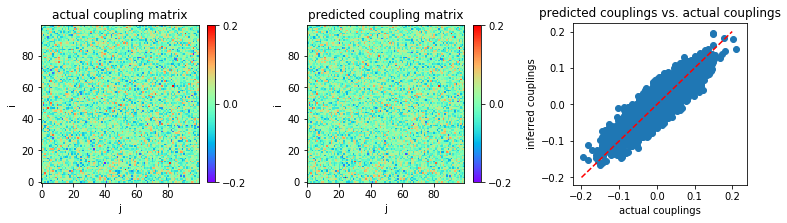

In [11]:
plt.figure(figsize=(11,3.2))

plt.subplot2grid((1,3),(0,0))
plt.title('actual coupling matrix')
plt.imshow(w0,cmap='rainbow',origin='lower')
plt.xlabel('j')
plt.ylabel('i')
plt.clim(-0.2,0.2)
plt.colorbar(fraction=0.045, pad=0.05,ticks=[-0.2,0,0.2])

plt.subplot2grid((1,3),(0,1))
plt.title('predicted coupling matrix')
plt.imshow(w,cmap='rainbow',origin='lower')
plt.xlabel('j')
plt.ylabel('i')
plt.clim(-0.2,0.2)
plt.colorbar(fraction=0.045, pad=0.05,ticks=[-0.2,0,0.2])

plt.subplot2grid((1,3),(0,2))
plt.title('predicted couplings vs. actual couplings')
plt.plot([-0.2,0.2],[-0.2,0.2],'r--')
plt.scatter(w0,w)
plt.xlabel('actual couplings')
plt.ylabel('inferred couplings')

plt.tight_layout(h_pad=1, w_pad=1.5)
plt.show()

In [12]:
MSE = np.mean((w-w0)**2)
print('MSE:',MSE)

('MSE:', 0.0005299059905942844)


## Very small coupling variability $(g=0.5)$ and large sample size $(L=10^5)$

Now, let us see whether the nMF inference result can be improved with a larger data length, $L=10^5$ for instance.

In [13]:
l = 100000
s = simulate.generate_data(w0,l)
w = inference.nmf(s)

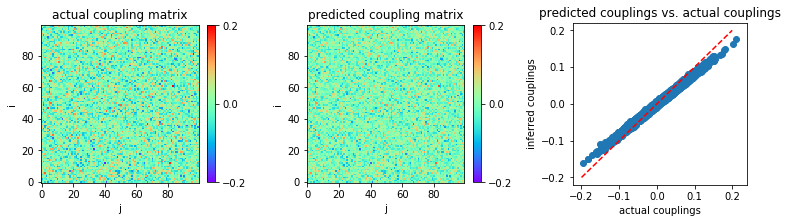

In [14]:
plt.figure(figsize=(11,3.2))

plt.subplot2grid((1,3),(0,0))
plt.title('actual coupling matrix')
plt.imshow(w0,cmap='rainbow',origin='lower')
plt.xlabel('j')
plt.ylabel('i')
plt.clim(-0.2,0.2)
plt.colorbar(fraction=0.045, pad=0.05,ticks=[-0.2,0,0.2])

plt.subplot2grid((1,3),(0,1))
plt.title('predicted coupling matrix')
plt.imshow(w,cmap='rainbow',origin='lower')
plt.xlabel('j')
plt.ylabel('i')
plt.clim(-0.2,0.2)
plt.colorbar(fraction=0.045, pad=0.05,ticks=[-0.2,0,0.2])

plt.subplot2grid((1,3),(0,2))
plt.title('predicted couplings vs. actual couplings')
plt.plot([-0.2,0.2],[-0.2,0.2],'r--')
plt.scatter(w0,w)
plt.xlabel('actual couplings')
plt.ylabel('inferred couplings')

plt.tight_layout(h_pad=1, w_pad=1.5)
plt.show()

In [15]:
MSE = np.mean((w-w0)**2)
print('MSE:',MSE)

('MSE:', 8.53008777227379e-05)


We thus conclude that nMF works well only in the limit of very small coupling variability and large sample sizes.